Tutorials from

* https://www.quanta.guru/docs/circuits/random/random/

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sys, math, time

from qiskit import BasicAer, execute
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

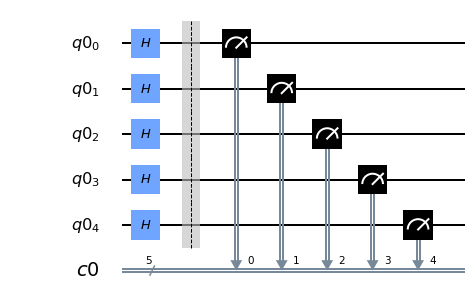

In [2]:
def get_circuit(Nbits):
    q = QuantumRegister(Nbits)
    c = ClassicalRegister(Nbits)
    
    ckt = QuantumCircuit(q, c)
    ckt.h(q)
    ckt.barrier()
    ckt.measure(q,c)
    return ckt

Nbits = 5;
ckt = get_circuit(Nbits)
ckt.draw(output = 'mpl')

In [5]:
ckt=get_circuit(Nbits)
n_qubits = ckt.n_qubits
backend=BasicAer.get_backend("qasm_simulator")
job = execute(ckt, backend=backend, shots=1000, memory=True)
res = job.result()
bit_str = ''.join(job.result().get_memory())
#print (res)


In [13]:
def get_random_Float(ckt, vmin=0., vmax =10.0, size=20 ):
    nbits = 100
    n_qubits = ckt.n_qubits
    #print (n_qubits)
    Nshots = (nbits * size + n_qubits -1) // n_qubits;
    #print ('Nshots=',Nshots)
    backend=BasicAer.get_backend("qasm_simulator");
    job = execute(ckt, backend=backend, shots=Nshots, memory=True);
    #print (job.result())
    bit_str = ''.join(job.result().get_memory())
    #print (bit_str, len(bit_str))
    scale = float(vmax-vmin)/float(2**nbits-1)
    
    random_vec = np.array([ vmin + scale*float(int(bit_str[i:i+nbits], 2)) 
                        for i in range(0, nbits*size, nbits)], dtype=float)

    return random_vec

ckt=get_circuit(Nbits)
Rvec=get_random_Float(ckt)

print (Rvec, len(Rvec))
    
    

[9.70970887 4.77166484 3.71678852 4.11737649 1.63298702 3.61232439
 0.60532657 1.05548258 2.5535934  0.42291008 7.34959298 8.03121522
 7.66835028 9.2294711  3.23469626 7.73643436 4.26361473 0.74058309
 6.20172842 6.32819081] 20


In [18]:
# Draw a sample from uniform distribution.
t1 = time.time()
sample = get_random_Float(ckt, vmin=-7.67, vmax=19.52, size=100)
#sample = uniform_rand_float64(circuit, glo_num_qubits, size=4321, vmin=-7.67, vmax=19.52)
t2 = time.time() - t1

print (t2)



0.050637006759643555


Uniform distribution over floating point numbers:
  sample type: <class 'numpy.ndarray'> , element type: float64 , shape: (100,)
  sample min: -7.3512, max: 19.4796
  sampling time: 0.05 secs


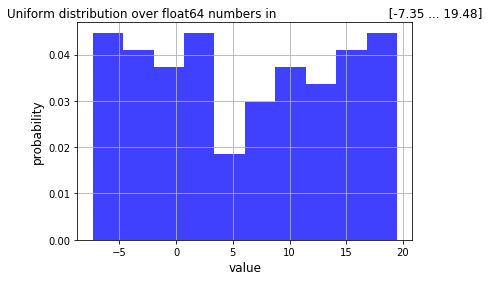

In [19]:
# Print out some details.
print("Uniform distribution over floating point numbers:")
print("  sample type:", type(sample), ", element type:", sample.dtype,", shape:", sample.shape)

print("  sample min: {:.4f}, max: {:.4f}".format(np.amin(sample), np.amax(sample)))
print("  sampling time: {:.2f} secs".format(t2))

# Plotting the distribution.
plt.hist(sample.ravel(),
         bins=min(int(np.ceil(np.sqrt(sample.size))), 100),
         density=True, facecolor='b', alpha=0.75)
plt.xlabel("value", size=12)
plt.ylabel("probability", size=12)
plt.title("Uniform distribution over float64 numbers in\
                             [{:.2f} ... {:.2f}]".format(
            np.amin(sample), np.amax(sample)), size=12)
plt.grid(True)
# plt.savefig("uniform_distrib_float.png", bbox_inches="tight")
plt.show()